# Context

After the [introduction of the viridis colormap](https://bids.github.io/colormap/) and subsequent adoption by matplotlib, the geoscientific community has started slowly transitioning from the default "rainbow" (or "jet") to the perceptually uniform and ordered colormaps. However, there is still oposition to this change. The main argument used agaist the change being that this is a subjective problem, and really depends on the eye-of-the-beholder.

[Some authors](https://agilescientific.com/blog/2017/12/14/no-more-rainbows) have shown powerful examples to dissuade readers of using rainbow colormap, however from these examples it is also clear that not only viridis isn't always the best option, but even the better options can always be improved upon (e.g. by adding contours and shading), and thus the notion of a default one-size-fits-all colormap goes away, and we are left with the realization that we must take the time to interrogate the data with different perceptually uniform and ordered colormaps until statisfied, which is OK.

## Problem definition

We want to produce a structure profile and color it with both rainbow and viridis colormap. Our belief is that this type of plot will help in reducing the perceived subjective problem to an easier-to-see-and-explain example as compared to the 2D surfaces in the references above.

## Where do we start

We begin using the Mount St Helens data, originally [here](https://agilescientific.com/blog/2014/5/6/how-much-rock-was-erupted-from-mt-st-helens.html) and then we use some data manipulation from [here](https://github.com/agile-geoscience/notebooks/blob/master/Mt_St-Helens.ipynb). I had not realized until working this project that the underlying data shown in the [viridis introduction](https://bids.github.io/colormap/) can be traced back to [Matt and Evan](https://github.com/matplotlib/viscm/tree/master/viscm/examples) (Neat!)

In [129]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
# Load the data
before = np.loadtxt('st-helens_before.txt')

In [131]:
# See what's in it
before

array([[-32767., -32767., -32767., ..., -32767., -32767., -32767.],
       [-32767., -32767., -32767., ..., -32767., -32767., -32767.],
       [-32767., -32767., -32767., ..., -32767., -32767., -32767.],
       ..., 
       [-32767., -32767., -32767., ..., -32767., -32767., -32767.],
       [-32767., -32767., -32767., ..., -32767., -32767., -32767.],
       [-32767., -32767., -32767., ..., -32767., -32767., -32767.]])

In [132]:
# Replace -32767.0 value with Nan (not a number)
before [before==-32767.] = np.nan

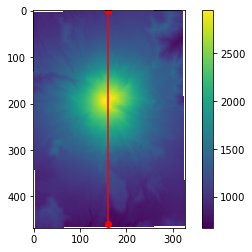

In [135]:
# Plot the grid
plt.imshow(before)

# plot a line showing where we will get our structure profile
plt.plot([160,160], [0,460], 'ro-' )
plt.colorbar()
plt.show()

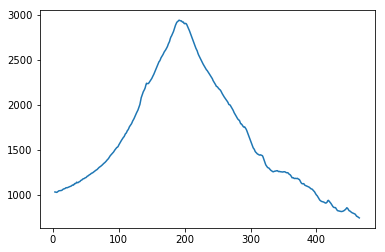

In [123]:
# Plot the structure profile slicing the numpy array
plt.plot(before[:,160])
plt.show()

If we don't want a profile aligned with the X or the Y axis we can follow this [answer](https://stackoverflow.com/questions/7878398/how-to-extract-an-arbitrary-line-of-values-from-a-numpy-array).

In [153]:
# We need the size of the array to make individual Y and Z numpy arrays
before.shape

(468, 327)

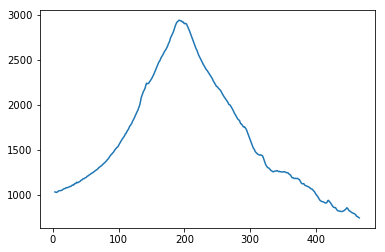

In [144]:
# Make two extra numpy arrays, one to keep the Y values, and one to keep the Z values
# We chose this nomenclature (Y, Z) to stay tied to the 3D space (XYZ) from the original data,
# i.e. our profile is a single valued X, with changing Y and Z
Y = np.linspace(0,468,468)
Z = before[:,160]

# Plot it to check for errors
plt.plot(Y,Z)

Now we need to define a couple of functions for coloring the area under the curve using colors picked from a colormap, or colorfill. This is mostly based on [this answer](https://stackoverflow.com/questions/18215276/how-to-fill-rainbow-color-under-a-curve-in-python-matplotlib), with some minor tweaks: 

1) Change the rainbow_fill to color_fill procedure, to pass the actual name of the colormap, so we can recycle the procedure later when we try with viridis.

2) Change the coloring of the rectangles from using the X array values to using the Y array values. For this I added a the normalization method (Normalize) and the assigment to variable color (cmap(norm(y))), based on learnings from [this answer](https://stackoverflow.com/a/42650009).  

In [145]:
# We need the min and max on the whole 2D array (before) for the normalization
# so the colormap range is the same in the grid and curve plots
np.nanmin(before), np.nanmax(before) 

(676.0, 2951.0)

In [150]:
# This procedure will make and place little rectangles under the curve
def rect(x,y,w,h,c):
    ax = plt.gca()
    polygon = plt.Rectangle((x,y),w,h,color=c)
    ax.add_patch(polygon)

# This procedure is for finding the x, y, and color values for each little rectangle under the curve
# this procedure uses the procedure defined above for drawing the little rectangles (rect)
def color_fill(X,Y, colormap):
    cmap = plt.get_cmap(colormap)
    plt.plot(X,Y,lw=0)  # Plot so the axes scale correctly

    dx = X[1]-X[0]
    norm = mpl.colors.Normalize(vmin=676, vmax=2951)
    
    for n, (x,y) in enumerate(zip(X,Y)):
        color = cmap(norm(y))
        rect(x,0,dx,y,color)

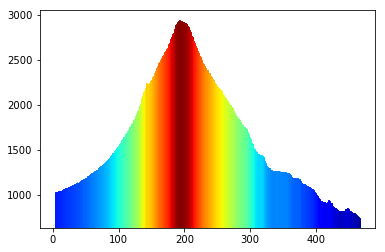

In [151]:
# Let's try with rainbow
color_fill(Y,Z,'jet')
plt.show()

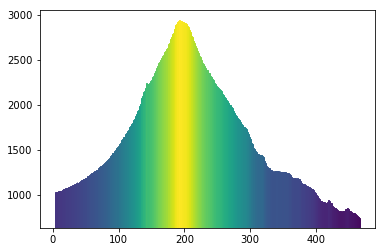

In [152]:
# and now with viridis
color_fill(Y,Z,'viridis')
plt.show()

## Discussion

The left portion of the rainbow display shows clearly its non-percetually uniformness, i.e. it adds a yellow color contour to an almost constant slope, which introduces display structure where there isn't in the data. The viridis plot is more smooth in this area, which is what we expected.

However, looking to the right hand of the plots, where there is a sharp change in slope (y=~1250, x=~325) we can see that rainbow misses the change to cyan by ~25 X units (in my opinion this is random, not really a win for rainbow), and the viridis plots shows just a minor change. I was expecting a more radical change given the change of slope. Perhaps for structure maps it would be beneficial to use as a complement colormaps that respond faster to changes in slope (second derivative).


## Other uses

We could use this color_fill procedure to color fill well logs :) and perhaps to answer this [question](https://stackoverflow.com/questions/36954416/colour-fill-based-on-values).

